In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("5.2-Summary of Weather.csv", low_memory=False)

In [3]:
df.head()
#STA = Station number
#precip = precipitation
#YR = year, MO = month, DA = day
#PRCP = Daily Total precipitation
#SNF = Snowfall

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [5]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [6]:
df.drop(labels=["WindGustSpd", "PoorWeather", "DR", "SPD", "SND", "FT", "FB", "FTI", "ITH", "PGT", "TSHDSBRSGF", "SD3", "RHX", "RHN", "RVG", "WTE"], axis=1, inplace=True)

In [7]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [8]:
df.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118566.000000,118572.000000,118542.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.869361,14.481498,14.211082
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


In [9]:
# deleting redundant columns

In [10]:
df.drop(labels=["YR", "MO", "DA", "MAX", "MIN", "MEA", "SNF", "Date"], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117877 non-null  object 
 6   PRCP      117108 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.4+ MB


In [12]:
df.isnull().sum()

STA            0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
PRCP        1932
dtype: int64

In [13]:
df["Snowfall"].unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [14]:
df["Snowfall"].value_counts()

Snowfall
0          115690
5.08          534
2.54          339
7.62          330
10.16         205
12.7           92
20.32          83
17.78          78
15.24          74
22.86          69
25.4           68
#VALUE!        44
27.94          40
30.48          31
45.72          25
50.8           24
48.26          22
35.56          20
33.02          15
60.96          13
38.1           11
66.04          11
53.34          10
43.18          10
63.5            7
55.88           6
40.64           6
76.2            5
58.42           5
81.28           4
78.74           2
73.66           1
86.36           1
83.82           1
68.58           1
Name: count, dtype: int64

In [15]:
df["Snowfall"] = df["Snowfall"].replace("#VALUE!", np.nan)

In [16]:
df["Snowfall"].unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58'], dtype=object)

In [17]:
df["Snowfall"] = df["Snowfall"].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117833 non-null  float64
 6   PRCP      117108 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.4+ MB


In [19]:
df["PRCP"].unique()

array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03', '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94',
       '0.16', '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12',
       '0.33', '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27',
       '2.29', '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21',
       '0.19', '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47',
       '0.23', '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06',
       '0.55', '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54',
       '1.42', '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86',
       '4.76', '1.66', '0.92', '0.83', '1.77', '0.09', nan, '1.97',
       '0.69', '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35',
       '0.97', '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1',
       '1.37', '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33',
       '1.33', '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24',
       '1.43',

In [20]:
df["PRCP"].value_counts()

PRCP
0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
        ...  
4.87        1
4.2         1
4.98        1
4.88        1
6.34        1
Name: count, Length: 540, dtype: int64

In [21]:
df["PRCP"] = df["PRCP"].replace("T", np.nan)

In [22]:
df["PRCP"] = df["PRCP"].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117833 non-null  float64
 6   PRCP      100355 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP
0,10001,1.016,25.555556,22.222222,23.888889,0.0,0.04
1,10001,0,28.888889,21.666667,25.555556,0.0,0.00
2,10001,2.54,26.111111,22.222222,24.444444,0.0,0.10
3,10001,2.54,26.666667,22.222222,24.444444,0.0,0.10
4,10001,0,26.666667,21.666667,24.444444,0.0,0.00


In [25]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [26]:
df["Precip"].value_counts()

Precip
0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In [27]:
df["Precip"] = df["Precip"].replace("T", np.nan)

In [28]:
df["Precip"] = df["Precip"].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    102287 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117833 non-null  float64
 6   PRCP      100355 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.4 MB


In [30]:
df_clean = df.dropna()

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       99656 non-null  int64  
 1   Precip    99656 non-null  float64
 2   MaxTemp   99656 non-null  float64
 3   MinTemp   99656 non-null  float64
 4   MeanTemp  99656 non-null  float64
 5   Snowfall  99656 non-null  float64
 6   PRCP      99656 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.1 MB


In [44]:
# EDA 

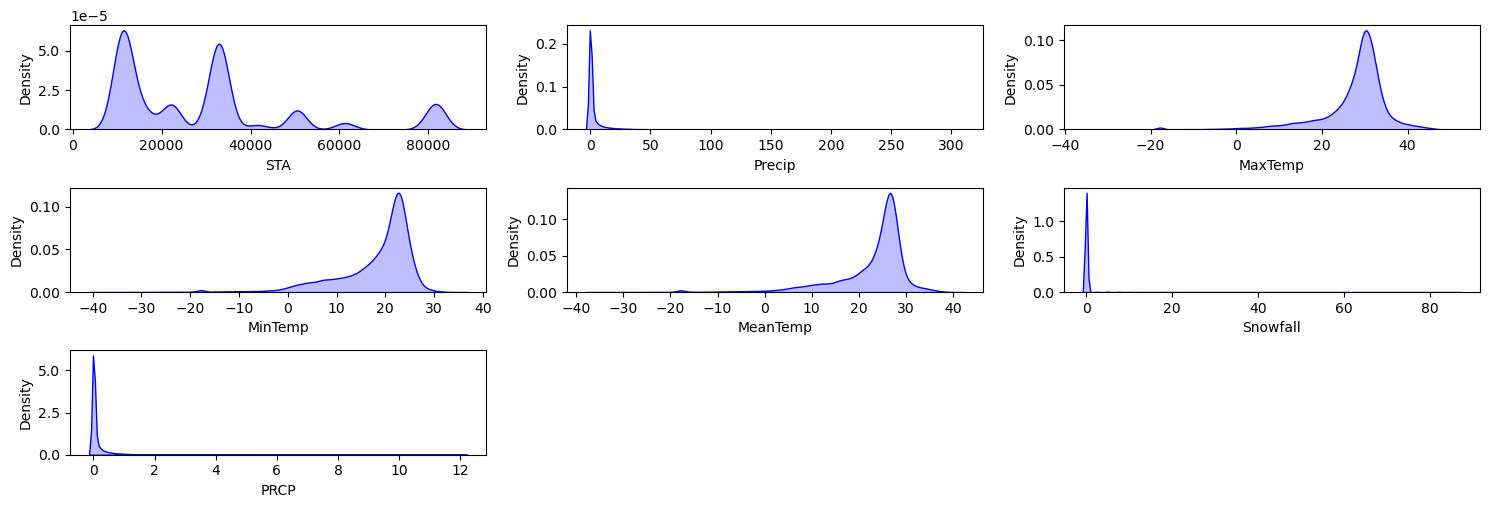

In [45]:
plt.figure(figsize=(15,8))

for i in range(0,len(df_clean.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_clean[df_clean.columns[i]], color="b", fill=True)
    plt.xlabel(df_clean.columns[i])
    plt.tight_layout()
plt.show()    

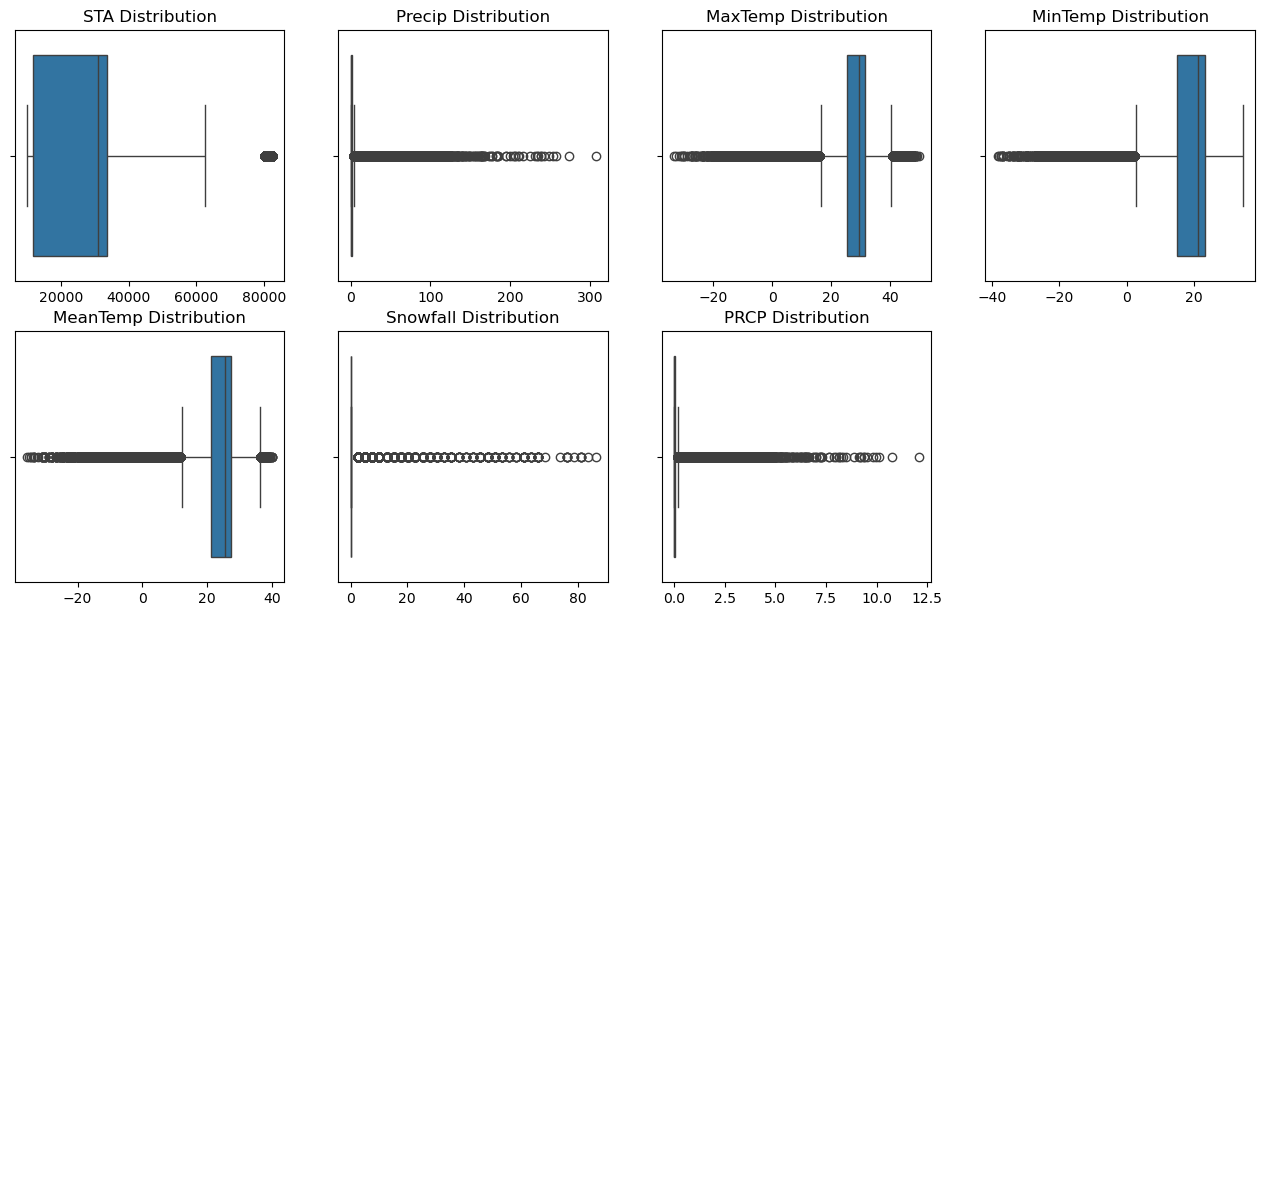

In [46]:
columns = df_clean.columns
(fig, ax) = plt.subplots(4,4, figsize=(16,15))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.boxplot (
        data = df_clean,
        x= column,
        ax = ax[i]  
    )

    ax[i].set_title(f"{column} Distribution")
    ax[i].set_xlabel(None)

for i in range (i + 1, len(ax)):
    ax[i].axis("off")

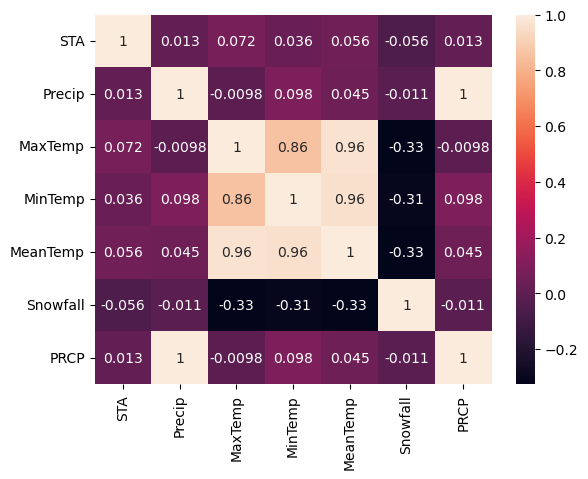

In [35]:
sns.heatmap(df_clean.corr(),annot=True)
plt.show()

In [36]:
# dependent & independent features

In [37]:
X = df_clean.drop("MeanTemp", axis=1)
y = df_clean["MeanTemp"]

In [38]:
X.head()

,STA,Precip,MaxTemp,MinTemp,Snowfall,PRCP
0,10001,1.016,25.555556,22.222222,0.0,0.04
1,10001,0.000,28.888889,21.666667,0.0,0.00
2,10001,2.540,26.111111,22.222222,0.0,0.10
3,10001,2.540,26.666667,22.222222,0.0,0.10
4,10001,0.000,26.666667,21.666667,0.0,0.00


In [39]:
y

0         23.888889
1         25.555556
2         24.444444
3         24.444444
4         24.444444
            ...    
119035    23.333333
119036    23.888889
119037    23.333333
119038    23.333333
119039    23.333333
Name: MeanTemp, Length: 99656, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79724 entries, 55555 to 8908
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       79724 non-null  int64  
 1   Precip    79724 non-null  float64
 2   MaxTemp   79724 non-null  float64
 3   MinTemp   79724 non-null  float64
 4   Snowfall  79724 non-null  float64
 5   PRCP      79724 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.3 MB


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19932 entries, 7532 to 12346
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       19932 non-null  int64  
 1   Precip    19932 non-null  float64
 2   MaxTemp   19932 non-null  float64
 3   MinTemp   19932 non-null  float64
 4   Snowfall  19932 non-null  float64
 5   PRCP      19932 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [47]:
X_train.corr()

,STA,Precip,MaxTemp,MinTemp,Snowfall,PRCP
STA,1.000000,0.012287,0.070593,0.034071,-0.055635,0.012287
Precip,0.012287,1.000000,-0.009101,0.098015,-0.011969,1.000000
MaxTemp,0.070593,-0.009101,1.000000,0.859811,-0.325406,-0.009101
MinTemp,0.034071,0.098015,0.859811,1.000000,-0.305497,0.098015
Snowfall,-0.055635,-0.011969,-0.325406,-0.305497,1.000000,-0.011969
PRCP,0.012287,1.000000,-0.009101,0.098015,-0.011969,1.000000


In [50]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [51]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [52]:
columns_dropping

{'MinTemp', 'PRCP'}

In [54]:
X_train.drop(columns_dropping, axis=1, inplace=True)

In [55]:
X_test.drop(columns_dropping, axis=1, inplace=True)

In [56]:
X_train.shape

(79724, 4)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

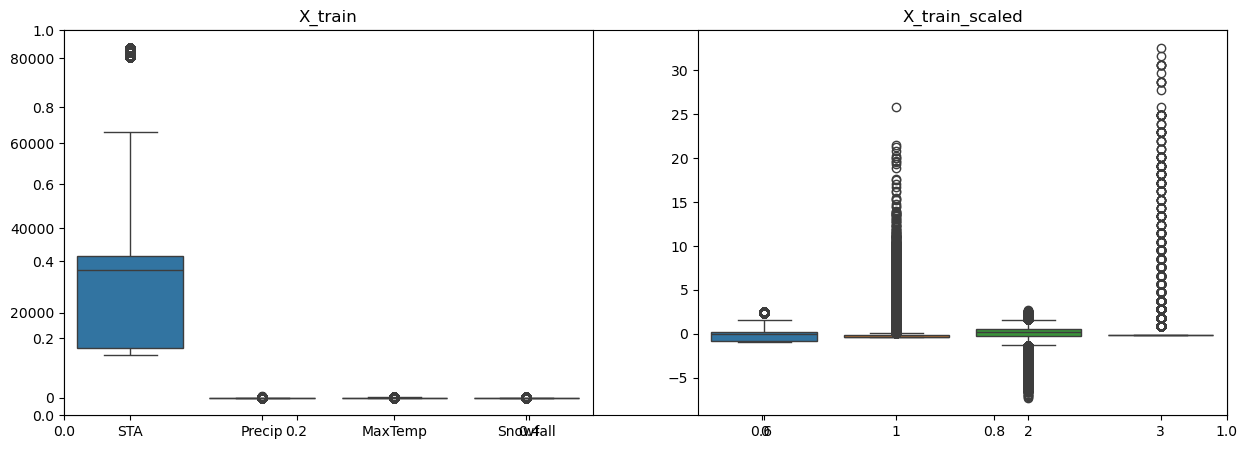

In [60]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train")

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [61]:
# Linear, Lasso, Ridge, Elasticnet

In [62]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Error:  1.570670662483556
Mean Squared Error:  4.09654271510652
R2 Score:  0.9340101551105469


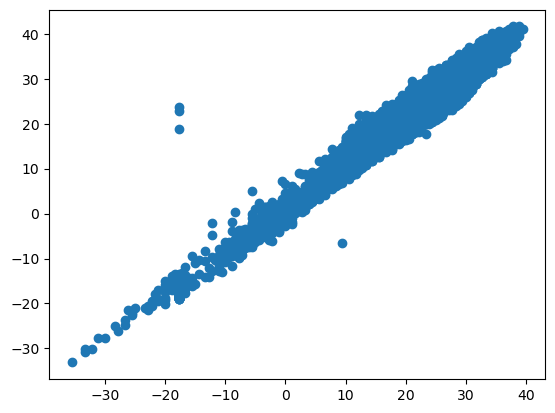

In [63]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.8150117729944057
Mean Squared Error:  5.297315671531989
R2 Score:  0.9146673026975197


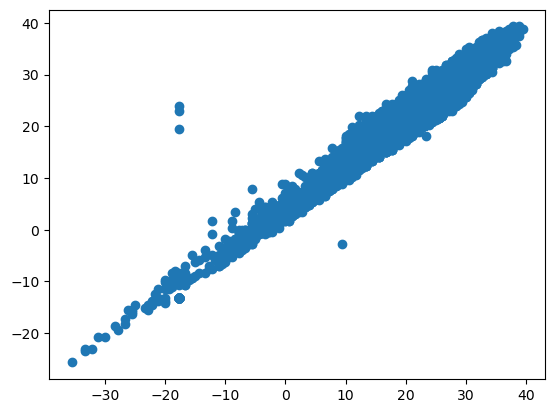

In [64]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.5706708466040076
Mean Squared Error:  4.0965421853176816
R2 Score:  0.9340101636447391


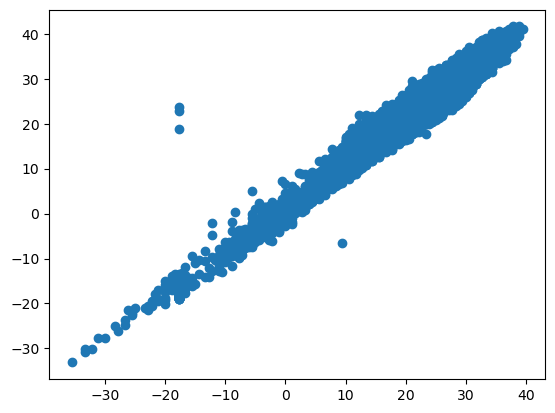

In [65]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  2.640484548072289
Mean Squared Error:  12.325139187392438
R2 Score:  0.8014584297589098


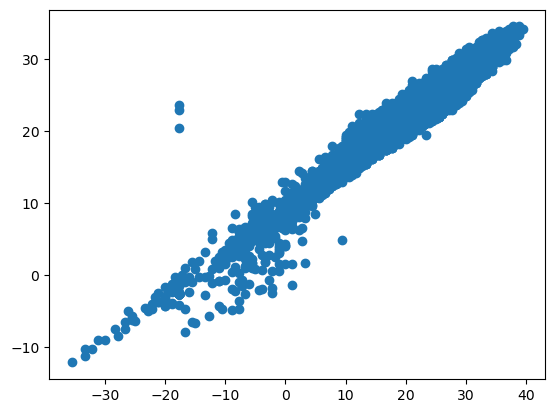

In [66]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

In [70]:
# cross validation Lasso

Mean Absolute Error:  1.5705137294615492
Mean Squared Error:  4.096837353594452
R2 Score:  0.9340054088770838


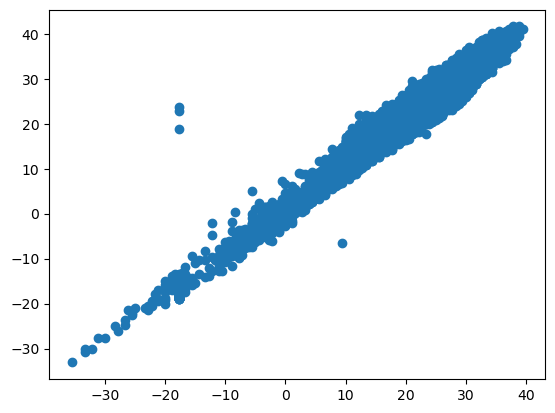

In [71]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

In [72]:
# cross validation Ridge

Mean Absolute Error:  1.570670680895608
Mean Squared Error:  4.096542661265732
R2 Score:  0.9340101559778502


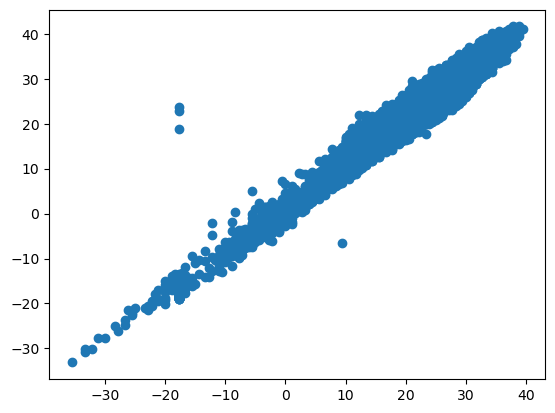

In [73]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

In [74]:
# cross validation ElasticNet

Mean Absolute Error:  1.5716516098917022
Mean Squared Error:  4.100909943979663
R2 Score:  0.9339398048723149


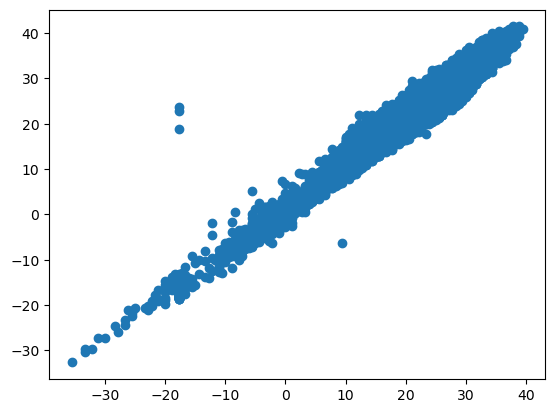

In [76]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()